# Defect_Data_Preprocessing

Written by: Angelo D. Bonzanini and Ketong Shao (August 2021)

This script loads the (already-augmented) data of SEM images, EDX spectra, and labels from a Google drive folder and processes it as follows:

* Plots the data to visualize how it is organized
* Re-scales the image data from [-1, 1] to [0, 255] (necessary for the next step, though there may be libraries that do not require this specific scaling)
* Converts the 2-channel image to a 3-channel (RGB) image
* Normalizes the 3-channel image to [0, 1]
* Saves the data into .npy format


## Imports

In [3]:
# General
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image as im

# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Load SEM and EDX data provided by Lam Research

1.   List item
2.   List item



In [4]:
execution_path = '/content/gdrive/MyDrive/Colab Notebooks/Code/ML-for-plasmas'
targetDir = os.path.join(execution_path , "../Data/CNN_Data_LAM")
trainData = np.load(targetDir+'/train_data_6rot_3layer.npy', allow_pickle=True)
testData = np.load(targetDir+'/train_data_0rot_3layer.npy', allow_pickle=True)

### Plot the data to get intuition on the structure

Overall training data dimensions: (23880, 4)
-----------------------------------------------
trainData[i, 0] shape: (140, 140)
trainData[i, 1] shape: (1, 4096)
trainData[i, 2] shape: (4096,)
trainData[i, 3] shape: (8,)
-----------------------------------------------


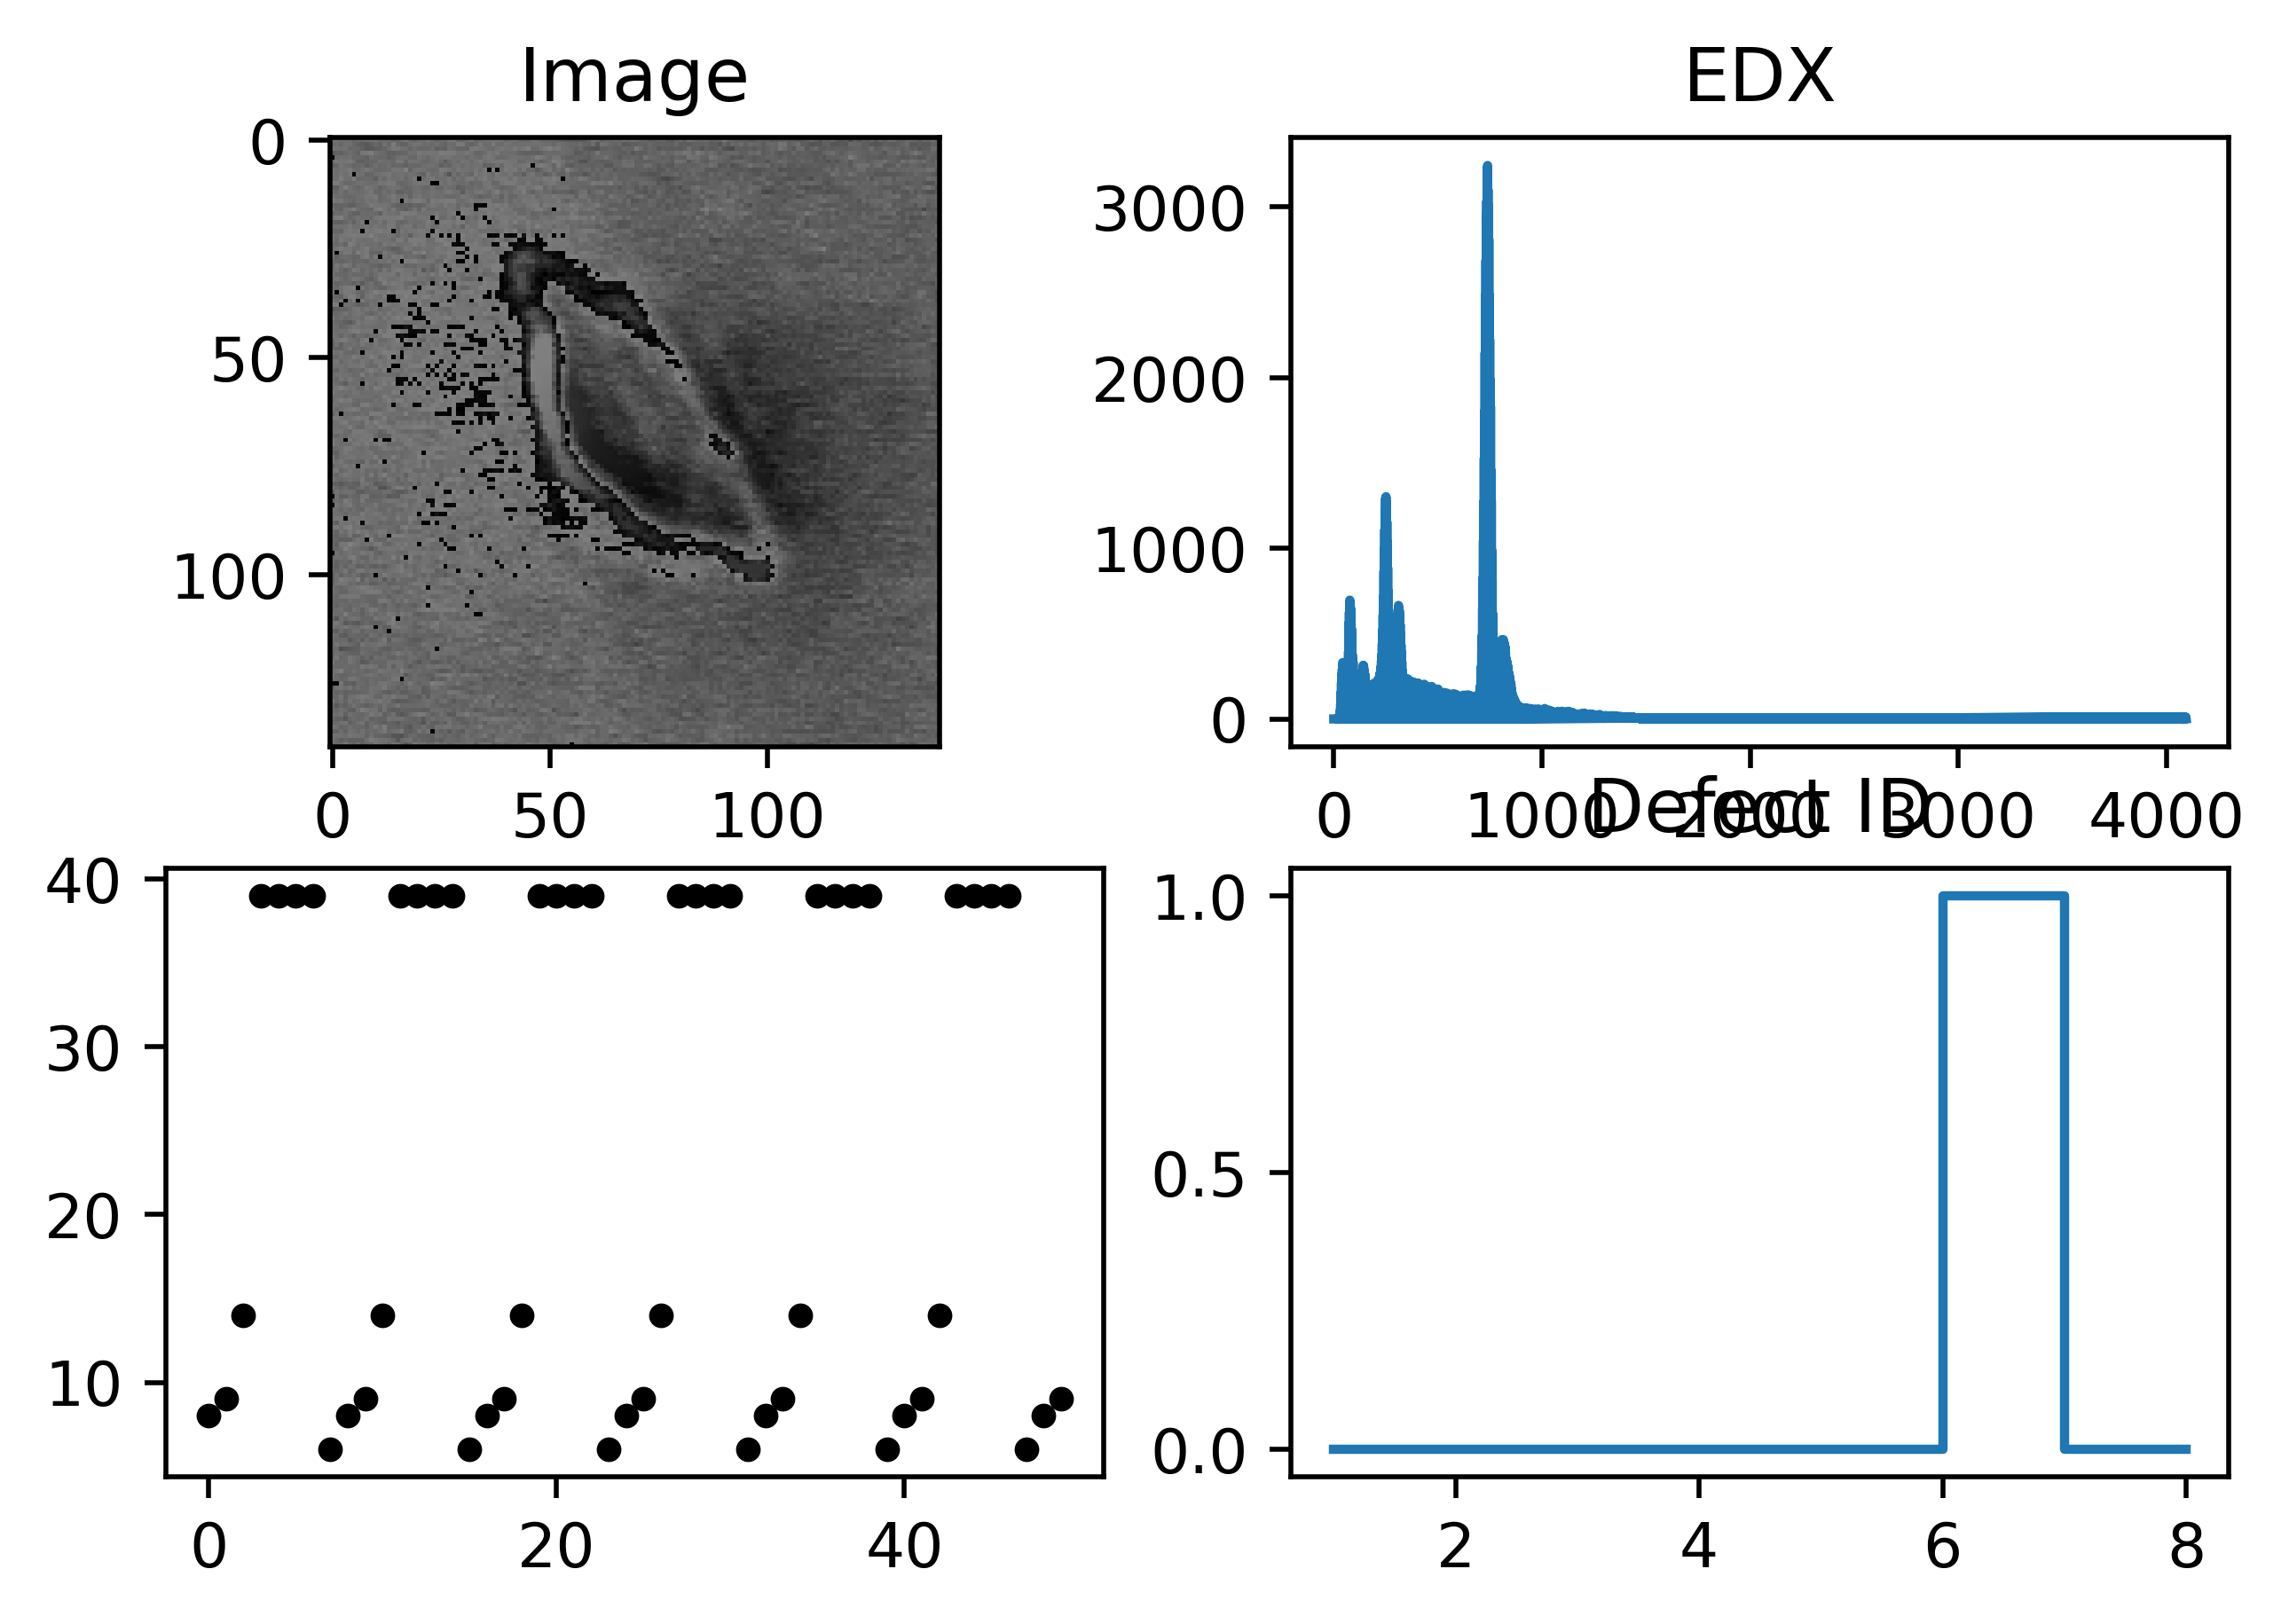

In [5]:
# Print dimensions of each array within the array
print('Overall training data dimensions:', trainData.shape)
print('-----------------------------------------------')
for j in range(0, 4):
    print('trainData[i, %d] shape:' %j, trainData[0,j].shape)
print('-----------------------------------------------')

# Plot
plt.figure(dpi=500)
plt.subplot(221)
plt.imshow(trainData[0, 0], cmap='gray', vmin=-1, vmax=1)
plt.title('Image')
plt.subplot(222)
plt.plot(trainData[0, 1][0, :])
plt.title('EDX')
plt.subplot(223)
plt.plot(trainData[0, 2][0:50], 'k.')
plt.subplot(224)
plt.step(list(range(1, len(trainData[0,3])+1)), trainData[0, 3])
plt.title('Defect ID')
plt.show()

### Extract Training Images and Labels and re-scale for RGB (3-channel) conversion

In [6]:
# Scale images from 0 to 255 for RGB conversion
imgSize = trainData[0,0].shape
Ntrain = len(trainData)
Ntest = len(testData)
imgMin = trainData[0,0].min()
imgMax = trainData[0,0].max()

trainImages = (trainData[:,0]-imgMin)*255.0/(imgMax-imgMin)
trainSpectra = np.concatenate(trainData[:,1], axis=0)
trainLabels = np.concatenate(trainData[:,3]).reshape(Ntrain, -1)

testImages = (testData[:,0]-imgMin)*255.0/(imgMax-imgMin)
testSpectra = np.concatenate(testData[:,1], axis=0)
testLabels = np.concatenate(testData[:,3]).reshape(Ntest, -1)

specMin = testSpectra.min()
specMax = testSpectra.max()

del trainData, testData

In [7]:
# Normalize
def normalize0to1(dataset, min, max):
  dataset = (dataset-float(min))/float(max-min)
  return dataset

In [ ]:
# Convert to 3-channel (RGB) image
imgTrain = []
for i in range(0, Ntrain):
  if i+1%100:
    print('iteration %d of %d' %(i, Ntrain))

  imgRGB  = im.fromarray(trainImages[i]).convert('RGB')
  imgTrain += [np.array(imgRGB.getdata()).reshape(imgSize[0], imgSize[1], 3)]

imgTrain = np.concatenate(imgTrain, axis=0).reshape(-1, 140, 140, 3)

Streaming output truncated to the last 5000 lines.
iteration 18880 of 23880
iteration 18881 of 23880
iteration 18882 of 23880
iteration 18883 of 23880
iteration 18884 of 23880
iteration 18885 of 23880
iteration 18886 of 23880
iteration 18887 of 23880
iteration 18888 of 23880
iteration 18889 of 23880
iteration 18890 of 23880
iteration 18891 of 23880
iteration 18892 of 23880
iteration 18893 of 23880
iteration 18894 of 23880
iteration 18895 of 23880
iteration 18896 of 23880
iteration 18897 of 23880
iteration 18898 of 23880
iteration 18899 of 23880
iteration 18900 of 23880
iteration 18901 of 23880
iteration 18902 of 23880
iteration 18903 of 23880
iteration 18904 of 23880
iteration 18905 of 23880
iteration 18906 of 23880
iteration 18907 of 23880
iteration 18908 of 23880
iteration 18909 of 23880
iteration 18910 of 23880
iteration 18911 of 23880
iteration 18912 of 23880
iteration 18913 of 23880
iteration 18914 of 23880
iteration 18915 of 23880
iteration 18916 of 23880
iteration 18917 of 23880

In [ ]:
# Check dimensions
print(imgTrain.shape)
print(trainSpectra.shape)

imgTrain = normalize0to1(imgTrain, 0, 255)
trainSpectra = normalize0to1(trainSpectra, specMin, specMax)

plt.figure(dpi=500)
plt.subplot(121)
plt.imshow(imgTrain[0,:,:,:])
plt.subplot(122)
plt.plot(trainSpectra[0,:])
plt.show()

In [ ]:
# Save
np.save(execution_path + '/../Data/imgTrain', imgTrain)
del imgTrain
np.save(execution_path + '/../Data/specTrain', trainSpectra)
del trainSpectra
np.save(execution_path + '/../Data/yTrain', trainLabels)
del trainLabels

In [ ]:
# Convert to 3-channel (RGB) image
imgTest = []
for i in range(0, Ntest):
  if i+1%100:
    print('iteration %d of %d' %(i, Ntest))

  imgRGB  = im.fromarray(testImages[i]).convert('RGB')
  imgTest += [np.array(imgRGB.getdata()).reshape(imgSize[0], imgSize[1], 3)]

imgTest = np.concatenate(imgTest, axis=0).reshape(-1, 140, 140, 3)

In [ ]:
# Check dimensions
print(imgTest.shape)
print(testSpectra.shape)

imgTest = normalize0to1(imgTest, 0, 255)
testSpectra = normalize0to1(testSpectra, specMin, specMax)

plt.figure()
plt.subplot(121)
plt.imshow(imgTest[0,:,:,:])
plt.subplot(122)
plt.plot(testSpectra[0,:])
plt.show()

In [ ]:
# Save
np.save(execution_path + '/../Data/imgTest', imgTest)
del imgTest
np.save(execution_path + '/../Data/specTest', testSpectra)
del testSpectra
np.save(execution_path + '/../Data/yTest', testLabels)
del testLabels

## Load data and check it was saved correctly

In [ ]:
xTrain = np.load(execution_path+'/../Data/imgTrain.npy')
yTrain = np.load(execution_path+'/../Data/yTrain.npy')
xTest= np.load(execution_path+'/../Data/imgTest.npy')
yTest = np.load(execution_path+'/../Data/yTest.npy')

In [ ]:
print(xTrain.shape)
print(xTrain.max())
print(xTest.min())
plt.imshow(xTrain[0,:,:,:])
plt.show()

In [ ]:
print(xTest.shape)
print(xTest.max())
print(xTest.min())
plt.imshow(xTest[0,:,:,:])
plt.plot()
plt.show()